# Python Visualization Workshop for Solar Power Generation & Sensor Data

The goal of this workshop is to take meaningful IoT data, prepare/clean it for analysis and create informative visualizations.
You will learn:
- how to create various types of plots (e.g. time-series, histogram, bar, etc.) using matplotlib to make insightful analyses
- how to use moving averages to filter data for readability
- how to use other Python visualization modules to explore certain aspects of data to a deeper level of understanding

In [118]:
# Loading in some basic Python libraries. We will use pandas and matplotlib to begin
import pandas as pd
import matplotlib.pyplot as plt

### What is the dataset we will be using, exactly?

This data was collected from a solar power generation plant in India over 34 days. There are two csv files - one that contains the plant's power generation data and one that contains the weather data collected from the plant's corresponding sensors. The power generation dataset is gathered from the inverter-level, where each inverter (labelled by source key) has an array of solar panels attached to it. The weather dataset is collected from the plant-level, with a single array of sensors optimally placed to be responsible for the entire plant.

If you would like to read more and access this dataset for yourself, you can find it through this link:
https://www.kaggle.com/datasets/anikannal/solar-power-generation-data

In [119]:
# Reading the csv datasets into our Python environment
df1 = pd.read_csv('Plant_1_Generation_Data.csv')
df2 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
# temp_data = df2.drop(columns=['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY'])
# df = pd.concat([df1, temp_data], axis=1) # Merging data from two csv files

### A quick summary of the dataframes we created using pandas...

In [120]:
df1.head() # Only first few rows of data for viewing clarity

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [121]:
df2.head() # Only first few rows of data for viewing clarity

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


### What do we know about these datasets? Let's run .info() and .describe() to see!

In [122]:
# Concise Dataset Summary
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None


In the power generation dataset, there are:

- 7 columns and 68778 rows
- 4 float64 columns, 1 int64 column and 2 object columns
- no missing values from any columns in the dataset! Each column has 68778 non-null values!

In [123]:
# Concise Dataset Summary
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB
None


In the weather sensor dataset, there are:

- 6 columns and 3182 rows
- 3 float64 columns, 1 int64 column and 2 object columns
- no missing values from any columns in the dataset! Each column has 3182 non-null values!

Note that the two datasets are not the same size! 

In [124]:
# Descriptive Statistics Analysis
print(df1.describe())

        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06


In [125]:
# Descriptive Statistics Analysis
print(df2.describe())

        PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652


Displayed above is a descriptive statistics analysis showing the mean, std, min, max, etc. of the various metrics collected by the solar plant from both datasets. This includes the DC/AC power generation, the daily/total yield, the ambient/module temperature, irradiation, etc.

### Let's begin by visualizing the daily yield of the plant over the timeframe!

Visualizing some of the metrics collected by the plant can be useful for identifying patterns and managing/maintaing operations. A Time-Series Analysis of the plant's daily yield, over the time the data was collected, can be plotted using the matplotlib library. 

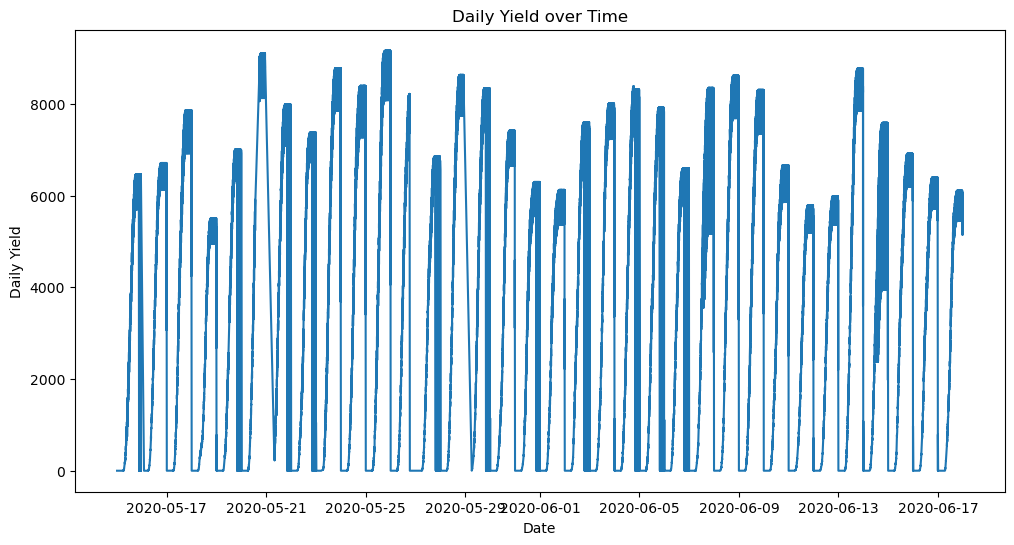

In [126]:
# Data Visualization Analysis
# Convert the DATE_TIME column to a datetime type
df1['DATE_TIME'] = pd.to_datetime(df1['DATE_TIME'], format='%d-%m-%Y %H:%M')
# Sort the dataframe by the DATE_TIME column
df1 = df1.sort_values('DATE_TIME')
# Set the DATE_TIME column as the index
df1.set_index('DATE_TIME', inplace=True)

# Plot the DAILY_YIELD over time
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['DAILY_YIELD'])
plt.xlabel('Date')
plt.ylabel('Daily Yield')
plt.title('Daily Yield over Time')
plt.show()

### Using the same date/time index, we can do the same for the plant's DC power generation as well!

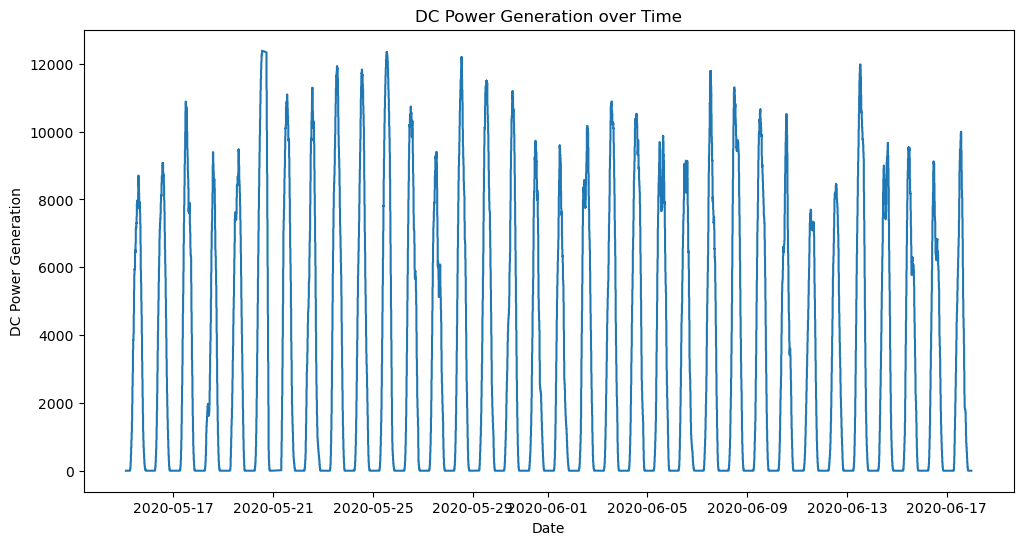

In [127]:
# Plot the DC_POWER over time
window_size = 200
df1['DCP_ma'] = df1['DC_POWER'].rolling(window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['DCP_ma'])
plt.xlabel('Date')
plt.ylabel('DC Power Generation')
plt.title('DC Power Generation over Time')
plt.show()

### In visualizing the DC Power above, we used a moving average to filter the data for readability. Try uncommenting the code block below. Do you see the difference?

In [128]:
# Try running the code below and compare above
# plt.figure(figsize=(12, 6))
# plt.plot(df1.index, df1['DC_POWER'])
# plt.xlabel('Date')
# plt.ylabel('DC Power Generation')
# plt.title('DC Power Generation over Time')
# plt.show()

### Using what you've seen in the time-series plotting for DC Power shown above, do you think you can try plotting the time-series for AC Power? Make sure to use the moving average!

In [129]:
# Answer Key - Uncomment code below to see the plot!

# # Plot the AC_POWER over time
# window_size = 200
# df1['ACP_ma'] = df1['AC_POWER'].rolling(window_size).mean()
# plt.figure(figsize=(12, 6))
# plt.plot(df1.index, df1['ACP_ma'])
# plt.xlabel('Date')
# plt.ylabel('AC Power Generation')
# plt.title('AC Power Generation over Time')
# plt.show()

### So, what other meaningful data can we visualize? Let's do a performance comparison of each inverter in the plant!
Sorting the power generation data by source key, the performance from each inverter in the plant can be compared and displayed using a bar graph. This can help identify suboptimally performing equipment and the need for maintenance within the plant. How can we do this with Python and with Python data visualization modules such as matplotlib?

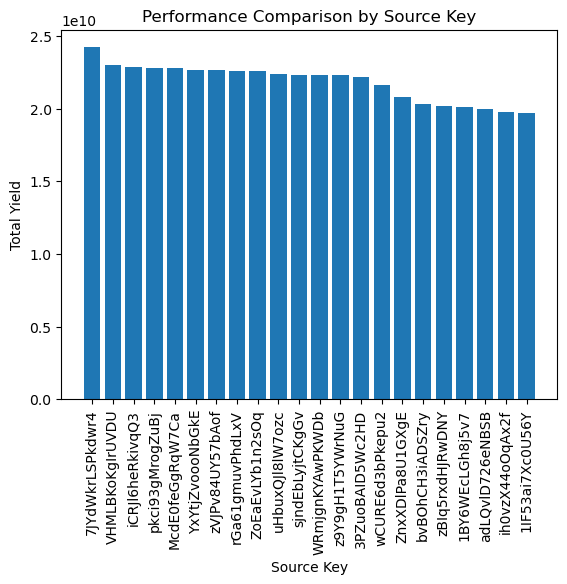

In [130]:
# Group data by source key and calculate the total yield for each
performance_df = df1.groupby('SOURCE_KEY')['TOTAL_YIELD'].sum()

# Sort the performance data in descending order
performance_df = performance_df.sort_values(ascending=False)

# Plot the bar graph
plt.bar(performance_df.index, performance_df)
plt.xlabel('Source Key')
plt.ylabel('Total Yield')
plt.title('Performance Comparison by Source Key')
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.show()

### Now, let's try visualizing the distribution of temperature levels read from the sensors!

Using the weather data acquired from the plant's sensors and collected in the second dataframe, we can plot a histogram displaying the distribution of temperature levels read. This can help identify any temperature extremes or clustering with the data. We'll begin with the ambient (environment) temperature.

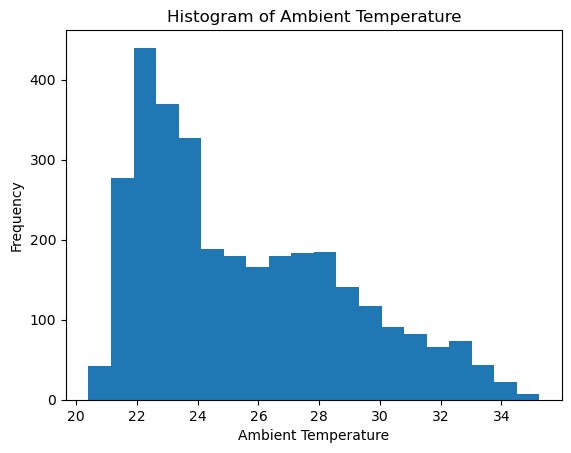

In [131]:
# Plot histogram of the temperature level distribution
plt.hist(df2['AMBIENT_TEMPERATURE'], bins=20)
plt.xlabel('Ambient Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Ambient Temperature')
plt.show()

### Your turn again! Try creating a histogram for the module temperature as well, using what you learned from plotting the ambient temperature above!

In [132]:
# Answer Key - Uncomment code below to see the plot!

# plt.hist(df2['MODULE_TEMPERATURE'], bins=20)
# plt.xlabel('Module Temperature')
# plt.ylabel('Frequency')
# plt.title('Histogram of Module Temperature')
# plt.show()

### Let's try using Bokeh for the next task - 

Let's attempt to visualize the correlation between the actual ambient (environment) temperature vs the module (sensor) temperature with a scatter plot, created using Bokeh (another Python visualization module).

In [133]:
# Loading in Bokeh plotting libraries
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [134]:
plot = figure(title='Ambient vs. Module Temperature', x_axis_label='Ambient Temperature (C)', y_axis_label='Module Temperature (C)')
plot.scatter(x=df2['AMBIENT_TEMPERATURE'], y=df2['MODULE_TEMPERATURE'], size=8, color='blue', alpha=0.6)
output_notebook()
show(plot)

Loading BokehJS ...

We can see that there is a strong positive relationship between the ambient temperature and the module temperature. This means that as the ambient temperature grows, the module temperature does as well. It is also clear from this plot that the module temperature increases a lot faster and to a higher maximum than the ambient temperature.

### Could we add a best fit (regression) line on top of this scatter plot to show this correlation even better?

In [135]:
# Importing Python libraries for Linear Regression model
import numpy as np
from sklearn.linear_model import LinearRegression

plot = figure(title='Ambient vs. Module Temperature', x_axis_label='Ambient Temperature (C)', y_axis_label='Module Temperature (C)')
plot.scatter(x=df2['AMBIENT_TEMPERATURE'], y=df2['MODULE_TEMPERATURE'], size=8, color='blue', alpha=0.6)

# Fit a linear regression model to the data
model = LinearRegression()
X = df2['AMBIENT_TEMPERATURE'].values.reshape(-1, 1)
y = df2['MODULE_TEMPERATURE'].values.reshape(-1, 1)
model.fit(X, y)

# Get the coefficients of the best fit line
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Calculate the x and y values for the best fit line
x_vals = np.array([df2['AMBIENT_TEMPERATURE'].min(), df2['AMBIENT_TEMPERATURE'].max()])
y_vals = slope * x_vals + intercept

plot.line(x_vals, y_vals, line_color='red', line_width=2)
output_notebook()
show(plot)

Loading BokehJS ...

In [136]:
print('Slope:', slope)
print('Intercept:', intercept)
print('Minimum Ambient Temperature:', x_vals.min())
print('Maximum Ambient Temperature:', x_vals.max())
print('Minimum Module Temperature:', y_vals.min())
print('Maximum Module Temperature:', y_vals.max())

Slope: 3.120361257033976
Intercept: -48.576817932528684
Minimum Ambient Temperature: 20.398504866666663
Maximum Ambient Temperature: 35.25248613333334
Minimum Module Temperature: 15.07388635483698
Maximum Module Temperature: 61.423674012052146


### What does this regression line show us?

- It better visualizes the scale of the trend between the ambient and module temperatures
- It identifies outliers and showcases strength of association between variables
- It helps us make simple predictions on the module temperature based on the ambient temperature